In [79]:
import os
import tensorflow as tf
from tensorflow import keras
import numpy as np
from PIL import Image
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from IPython.display import display

In [76]:
train_dir = '/Users/sreehari/Downloads/dogs-vs-cats/train'
test_dir = '/Users/sreehari/Downloads/dogs-vs-cats/test'

In [47]:
train_gen = ImageDataGenerator(rescale=1.0/255.0,
                               rotation_range=20,
                               zoom_range=0.2,
                               horizontal_flip=True,
                               validation_split=0.2)

In [48]:
train_data = train_gen.flow_from_directory(directory=train_dir,
                                           class_mode='binary',
                                           target_size=(150, 150),
                                           batch_size=20,
                                           subset='training')
valid_data = train_gen.flow_from_directory(directory=train_dir,
                                           class_mode='binary',
                                           target_size=(150, 150),
                                           batch_size=20,
                                           subset='validation')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [49]:
model = keras.Sequential([
    keras.layers.Conv2D(16, (3, 3), input_shape=(150, 150, 3), activation=tf.nn.relu),
    keras.layers.MaxPool2D(2, 2),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

In [50]:
model.compile(Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=(['accuracy']))

In [51]:
history = model.fit(train_data, epochs=20, batch_size=10, validation_data=valid_data, verbose=2)

Epoch 1/20
1000/1000 - 88s - loss: 0.6549 - accuracy: 0.6085 - val_loss: 0.5957 - val_accuracy: 0.6910 - 88s/epoch - 88ms/step
Epoch 2/20
1000/1000 - 87s - loss: 0.5727 - accuracy: 0.7049 - val_loss: 0.5174 - val_accuracy: 0.7522 - 87s/epoch - 87ms/step
Epoch 3/20
1000/1000 - 89s - loss: 0.5085 - accuracy: 0.7517 - val_loss: 0.4977 - val_accuracy: 0.7592 - 89s/epoch - 89ms/step
Epoch 4/20
1000/1000 - 96s - loss: 0.4720 - accuracy: 0.7768 - val_loss: 0.4625 - val_accuracy: 0.7822 - 96s/epoch - 96ms/step
Epoch 5/20
1000/1000 - 107s - loss: 0.4447 - accuracy: 0.7941 - val_loss: 0.4327 - val_accuracy: 0.8090 - 107s/epoch - 107ms/step
Epoch 6/20
1000/1000 - 107s - loss: 0.4293 - accuracy: 0.8008 - val_loss: 0.4211 - val_accuracy: 0.8098 - 107s/epoch - 107ms/step
Epoch 7/20
1000/1000 - 111s - loss: 0.4142 - accuracy: 0.8094 - val_loss: 0.4293 - val_accuracy: 0.8226 - 111s/epoch - 111ms/step
Epoch 8/20
1000/1000 - 128s - loss: 0.4015 - accuracy: 0.8153 - val_loss: 0.4172 - val_accuracy: 0.812

IndexError: tuple index out of range

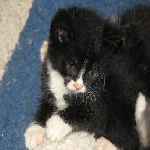

1/1 [==============================] - 0s 28ms/step
[[0.]]


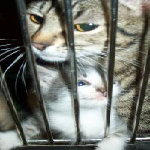

1/1 [==============================] - 0s 21ms/step
[[0.]]


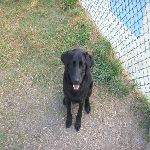

1/1 [==============================] - 0s 16ms/step
[[1.]]


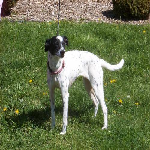

1/1 [==============================] - 0s 18ms/step
[[1.]]


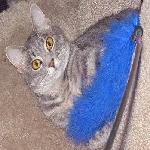

1/1 [==============================] - 0s 14ms/step
[[0.]]


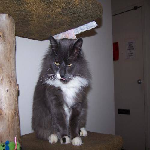

1/1 [==============================] - 0s 11ms/step
[[0.]]


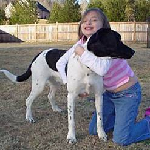

1/1 [==============================] - 0s 17ms/step
[[1.]]


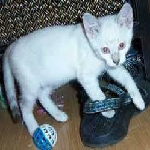

1/1 [==============================] - 0s 14ms/step
[[1.]]


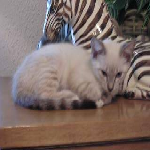

1/1 [==============================] - 0s 19ms/step
[[0.]]


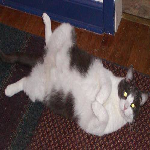

1/1 [==============================] - 0s 20ms/step
[[0.]]


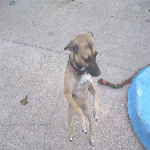

1/1 [==============================] - 0s 22ms/step
[[0.]]


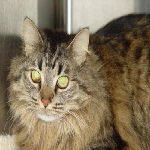

1/1 [==============================] - 0s 17ms/step
[[1.]]


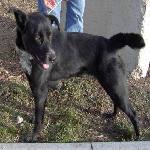

1/1 [==============================] - 0s 16ms/step
[[1.]]


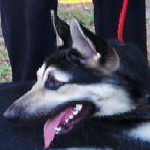

1/1 [==============================] - 0s 17ms/step
[[0.]]


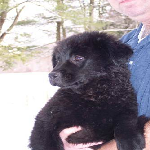

1/1 [==============================] - 0s 15ms/step
[[0.]]


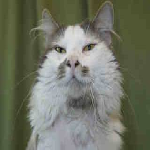

1/1 [==============================] - 0s 17ms/step
[[0.]]


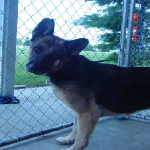

1/1 [==============================] - 0s 18ms/step
[[1.]]


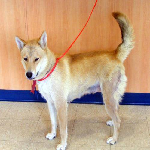

1/1 [==============================] - 0s 17ms/step
[[0.]]


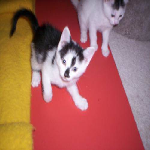

1/1 [==============================] - 0s 15ms/step
[[0.]]


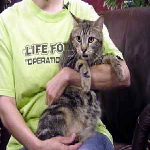

1/1 [==============================] - 0s 17ms/step
[[0.]]


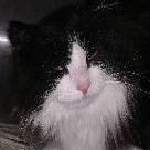

1/1 [==============================] - 0s 18ms/step
[[0.]]


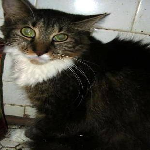

1/1 [==============================] - 0s 15ms/step
[[0.]]


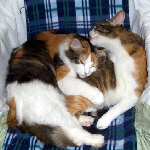

1/1 [==============================] - 0s 17ms/step
[[0.]]


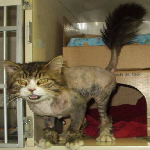

1/1 [==============================] - 0s 16ms/step
[[0.]]


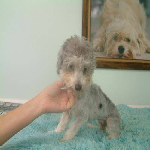

1/1 [==============================] - 0s 15ms/step
[[0.]]


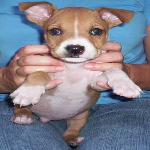

1/1 [==============================] - 0s 15ms/step
[[1.]]


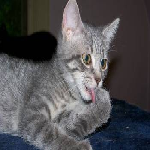

1/1 [==============================] - 0s 29ms/step
[[0.]]


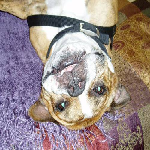

1/1 [==============================] - 0s 17ms/step
[[1.]]


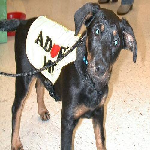

1/1 [==============================] - 0s 16ms/step
[[1.]]


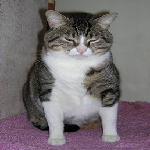

1/1 [==============================] - 0s 16ms/step
[[0.]]


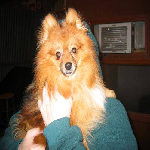

1/1 [==============================] - 0s 15ms/step
[[1.]]


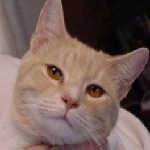

1/1 [==============================] - 0s 14ms/step
[[1.]]


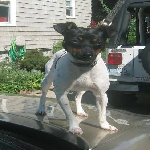

1/1 [==============================] - 0s 27ms/step
[[1.]]


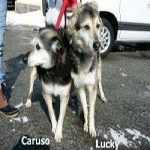

1/1 [==============================] - 0s 29ms/step
[[1.]]


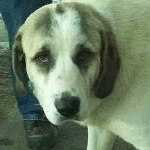

1/1 [==============================] - 0s 15ms/step
[[0.]]


KeyboardInterrupt: 

In [82]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from time import sleep

for imag in os.listdir(test_dir):
    imag = os.path.join(test_dir,imag)
    img = load_img(imag,target_size=(150,150))
    display(img)
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    image = np.vstack([x])

    # Perform prediction
    print(model.predict(image).round())
    sleep(3)